# ANALIZA PODATKOV
Podatke najprej uvozimo iz primerne datoteke in si nato ogledamo "prejeto" tabelo.
Pomen podatkov lahko v večini bralec prek naslova posamezne naslovne vrstice razbere sam, vredno je le omeniti, da fg_pct predstavlja povprečje vseh metov iz igre, stolpci fg3_pct, fg2_pct, ft_pct pa po isti logiki predstavljajo povprečje metov za 3 ali 2 točki oziroma popvprečje prostih metov (gre le za način zapisa, ki je v svetu košarke zelo popularen).

In [202]:
import pandas as pd
pd.options.display.max_rows = 10
igralci = pd.read_csv('players.csv')
igralci

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
0,Tom Abernethy,PF,0.63,0.00,0.42,0.63,1.57,0.62,2.35
1,Alvan Adams,C,0.81,0.09,0.50,0.81,6.22,3.86,12.53
2,Dennis Awtrey,C,0.63,0.00,0.42,0.63,2.70,1.13,2.33
3,Gus Bailey,SG,0.39,1.00,0.44,0.39,1.40,1.30,1.90
4,James Bailey,PF,0.70,0.04,0.48,0.70,4.78,0.80,8.56
...,...,...,...,...,...,...,...,...,...
3119,Coby White,PG,0.79,0.35,0.43,0.79,3.50,2.70,13.20
3120,Grant Williams,PF,0.72,0.25,0.55,0.72,2.60,1.00,3.40
3121,Nigel Williams-Goss,PG,1.00,0.29,0.33,1.00,0.60,0.60,1.40
3122,Zion Williamson,PF,0.64,0.43,0.59,0.64,6.30,2.10,22.50


Razvrstimo sedaj igralce po njihovem povprečju točk na tekmo in poglejmo ali prepoznamo katerega izmed aktivnih igralcev lige NBA. Opazimo, da so čisto pri vrhu nekateri znani še aktivni igralci (LeBron James, Kevin Durant, James Harden), malo nižje pa se skriva tudi Luka Dončić.

In [203]:
igralci_tocke = igralci.sort_values('points_per_game', ascending=False)
igralci_tocke[["name surname", "position", "points_per_game"]]

,name surname,position,points_per_game
1785,LeBron James,SG,27.05
2066,Kevin Durant,SG,26.88
2204,James Harden,SG,25.14
2936,Luka Dončić,SG,25.00
2422,Damian Lillard,PG,24.44
...,...,...,...
1593,Andy Panko,SF,0.00
581,Ron Crevier,C,0.00
2699,Ben Bentil,PF,0.00
1516,Derek Hood,PF,0.00


Sedaj je smiselno igralce pogrupirati po njihovi poziciji, saj bo velik del naše raziskave/naših hipotez posvečen raziskavi povezav med pozicijo igralca in njegovo statistiko.
To bo treba narediti ročno, saj pozicija igralca ni popolnoma fiksna (nekateri igralci (takih je sicer malo, kar je vidno iz spodnjega prikaza po številu) lahko večino časa preživijo na eni izmed pozicj, a občasno igra na drugi, sicer po vlogi podobni poziciji - tako da je korelacijo še vedno smiselno raziskovati, a je naveden v v obliki POZICIJA1-POZICIJA2). Pozicija 1 je tista, na kateri igralce preživi več časa, zato je le'to bolj smiselno vzeti kot njegovo standardno pozcijo.

In [204]:
position_group = igralci.groupby("position")
position_group.size()

position
C        555
C-PF       3
PF       640
PF-C       4
PF-SF      6
        ... 
SF-PF      4
SF-SG      3
SG       689
SG-PG      5
SG-SF      3
Length: 13, dtype: int64

In [205]:
cisti_centri = position_group.get_group("C")
prehodni_centri = position_group.get_group("C-PF")

In [206]:
centri = pd.concat([prehodni_centri, cisti_centri])
centri

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
418,Scott Hastings,C-PF,0.78,0.24,0.43,0.78,1.93,0.39,2.35
1880,Jackson Vroman,C-PF,0.58,0.00,0.40,0.58,2.92,0.70,3.35
3045,Donta Hall,C-PF,0.53,0.00,0.57,0.53,4.20,0.43,4.13
1,Alvan Adams,C,0.81,0.09,0.50,0.81,6.22,3.86,12.53
2,Dennis Awtrey,C,0.63,0.00,0.42,0.63,2.70,1.13,2.33
...,...,...,...,...,...,...,...,...,...
3091,Anžejs Pasečņiks,C,0.59,0.00,0.54,0.59,4.00,0.70,5.80
3092,Norvel Pelle,C,0.50,0.00,0.53,0.50,3.00,0.30,2.40
3093,Vincent Poirier,C,0.86,0.50,0.47,0.86,2.00,0.40,1.90
3100,Naz Reid,C,0.70,0.33,0.47,0.70,4.10,1.20,9.00


In [207]:
cisti_pf = position_group.get_group("PF")
prehodni_pf_1 = position_group.get_group("PF-C")
prehodni_pf_2 = position_group.get_group("PF-SF")

In [208]:
pf = pd.concat([cisti_pf, prehodni_pf_1, prehodni_pf_2])
pf

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
0,Tom Abernethy,PF,0.63,0.00,0.42,0.63,1.57,0.62,2.35
4,James Bailey,PF,0.70,0.04,0.48,0.70,4.78,0.80,8.56
7,Marvin Barnes,PF,0.50,0.00,0.40,0.50,3.90,0.90,3.20
8,Tim Bassett,PF,0.67,0.00,0.35,0.67,2.80,1.27,2.73
10,Ron Behagen,PF,0.83,0.00,0.39,0.83,2.30,1.20,3.80
...,...,...,...,...,...,...,...,...,...
855,Nate Johnston,PF-SF,0.78,0.42,0.37,0.78,0.93,0.03,2.10
898,Mike Williams,PF-SF,0.33,0.00,0.27,0.33,0.90,0.07,0.53
2081,Stéphane Lasme,PF-SF,0.40,0.00,0.30,0.40,2.27,0.13,3.57
2108,Marcus Williams,PF-SF,0.00,0.00,0.38,0.00,0.57,0.15,0.97


In [209]:
cisti_sf = position_group.get_group("SF")
prehodni_sf_1 = position_group.get_group("SF-PF")
prehodni_sf_2 = position_group.get_group("SF-SG")

In [210]:
sf = pd.concat([cisti_sf, prehodni_sf_1, prehodni_sf_2])
sf

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
5,Greg Ballard,SF,0.82,0.29,0.44,0.82,6.12,2.14,12.71
6,Mike Bantom,SF,0.65,0.27,0.48,0.65,5.54,2.20,11.30
19,Alonzo Bradley,SF,0.67,1.00,0.34,0.67,0.30,0.10,1.90
24,Junior Bridgeman,SF,0.85,0.24,0.48,0.85,3.08,2.49,13.03
25,Allan Bristow,SF,0.80,0.30,0.46,0.80,4.28,4.08,7.52
...,...,...,...,...,...,...,...,...,...
631,Walter Berry,SF-PF,0.71,0.14,0.56,0.71,4.06,1.20,11.33
1704,Drew Gooden,SF-PF,0.78,0.15,0.47,0.78,7.14,1.09,10.84
206,Bingo Smith,SF-SG,0.87,0.26,0.46,0.87,2.87,1.17,10.80
653,Anthony Jones,SF-SG,0.81,0.22,0.40,0.81,1.13,0.67,3.21


In [211]:
cisti_sg = position_group.get_group("SG")
prehodni_sg_1 = position_group.get_group("SG-SF")
prehodni_sg_2 = position_group.get_group("SG-PG")

In [212]:
sg = pd.concat([cisti_sg, prehodni_sg_1, prehodni_sg_2])
sg

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
3,Gus Bailey,SG,0.39,1.00,0.44,0.39,1.40,1.30,1.90
9,Billy Ray Bates,SG,0.64,0.30,0.40,0.64,1.28,1.25,8.65
14,Otis Birdsong,SG,0.55,0.24,0.50,0.55,2.48,3.09,15.28
15,Ron Boone,SG,0.86,0.26,0.42,0.86,2.27,3.02,9.70
18,Winford Boynes,SG,0.79,0.00,0.43,0.79,1.90,1.15,7.50
...,...,...,...,...,...,...,...,...,...
107,Lionel Hollins,SG-PG,0.74,0.14,0.44,0.74,1.91,4.00,9.60
163,Eric Money,SG-PG,0.85,0.00,0.47,0.85,1.57,3.73,8.73
1333,Ruben Nembhard,SG-PG,0.53,0.00,0.55,0.53,0.60,1.90,4.00
2073,Taurean Green,SG-PG,0.89,0.21,0.35,0.89,0.60,0.63,1.60


In [213]:
cisti_pg = position_group.get_group("PG")
prehodni_pg = position_group.get_group("PG-SG")

In [214]:
pg = pd.concat([cisti_pg, prehodni_pg])
pg

,name surname,position,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
12,Del Beshore,PG,0.67,0.39,0.35,0.67,0.90,2.00,3.60
13,Henry Bibby,PG,0.74,0.27,0.41,0.74,1.75,3.20,6.80
21,Mike Bratz,PG,0.82,0.26,0.41,0.82,1.60,3.11,6.11
30,Quinn Buckner,PG,0.68,0.12,0.46,0.68,2.56,3.76,7.86
32,Don Buse,PG,0.78,0.31,0.45,0.78,1.78,3.55,5.93
...,...,...,...,...,...,...,...,...,...
3119,Coby White,PG,0.79,0.35,0.43,0.79,3.50,2.70,13.20
3121,Nigel Williams-Goss,PG,1.00,0.29,0.33,1.00,0.60,0.60,1.40
3123,Justin Wright-Foreman,PG,0.75,0.20,0.50,0.75,1.30,1.80,4.80
1744,Mike Wilks,PG-SG,0.72,0.33,0.43,0.72,1.12,1.24,2.89


### HIPOTEZA 1

Sedaj imamo podatke smiselno pogrupirane, zato lahko pogledamo, kako je po procentih vsaka izmed pozicij po številu zastopana. Po hipotezi 1 pričakujemo enakomerno razporeditev (okviren 20%-20%-20%-20%-20%). 
Ko "narišemo" tortni diagram, opazimo da je temu res tako. Nekoliko je "na račun" igralcev pozicije center več le igralcev pozicije sg, a je graf vseeno dokaj enakomerno razporejen, zato lahko potrdimo hipotezo 1.
(Le to je tudi smiselno, če poznamo dejstvo, da imamo 5 pozicij, v igri pa je naenkrat po 1 igralec vsake pozicije)

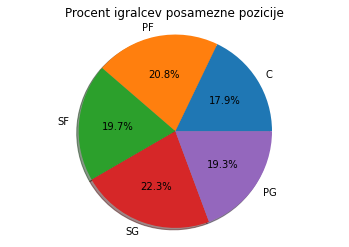

In [221]:
import matplotlib.pyplot as plt
all_players = len(pg) + len(sg) + len(sf) + len(pf) + len(centri)
labels = 'C', 'PF', 'SF', 'SG', 'PG'
sizes = [
        len(centri) / all_players, 
        len(pf) / all_players,
        len(sf) / all_players,
        len(sg) / all_players,
        len(pg) / all_players,
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')
plt.title('PROCENT IGRALCEV POSAMEZNE POZICIJE')
plt.show()

### POSTOPEK PREVEREJANJA HIPOTEZ 2, 3, 4 in 5

Hipoteze 2, 3, 4, 5 so postavljene glede na povprečje pozicije igralca (tu imena ne bodo pomebna, statistika igralca pa le za izrčun povprečja). Zato je smiselno poračunati povprečje po že ločenih pozicijah, ter nato definirati novo tabelo, v kateri bodo dostopni le za te hipoteze pomembni podatki (predstavitev bo potekala po pozicijah).

In [216]:
pg_mean = pg[["fg_pct","fg3_pct","fg2_pct","ft_pct", "rebounds", "asists", "points_per_game"]].mean()
sg_mean = sg[["fg_pct","fg3_pct","fg2_pct","ft_pct", "rebounds", "asists", "points_per_game"]].mean()
sf_mean = sf[["fg_pct","fg3_pct","fg2_pct","ft_pct", "rebounds", "asists", "points_per_game"]].mean()
pf_mean = pf[["fg_pct","fg3_pct","fg2_pct","ft_pct", "rebounds", "asists", "points_per_game"]].mean()
centri_mean = centri[["fg_pct","fg3_pct","fg2_pct","ft_pct", "rebounds", "asists", "points_per_game"]].mean()


In [217]:
data = {
	'fg_pct': [
		"{:.2%}".format(round(pg_mean.fg_pct, 4)), 
		"{:.2%}".format(round(sg_mean.fg_pct, 4)), 
		"{:.2%}".format(round(sf_mean.fg_pct, 4)), 
		"{:.2%}".format(round(pf_mean.fg_pct, 4)), 
		"{:.2%}".format(round(centri_mean.fg_pct, 4))
	],
	'fg3_pct': [
		"{:.2%}".format(round(pg_mean.fg3_pct, 4)), 
		"{:.2%}".format(round(sg_mean.fg3_pct, 4)), 
		"{:.2%}".format(round(sf_mean.fg3_pct, 4)), 
		"{:.2%}".format(round(pf_mean.fg3_pct, 4)), 
		"{:.2%}".format(round(centri_mean.fg3_pct, 4))
	],
	'fg2_pct': [
		"{:.2%}".format(round(pg_mean.fg2_pct, 4)), 
		"{:.2%}".format(round(sg_mean.fg2_pct, 4)), 
		"{:.2%}".format(round(sf_mean.fg2_pct, 4)), 
		"{:.2%}".format(round(pf_mean.fg2_pct, 4)), 
		"{:.2%}".format(round(centri_mean.fg2_pct, 4))
	],
	'ft_pct': [
		"{:.2%}".format(round(pg_mean.ft_pct, 4)), 
		"{:.2%}".format(round(sg_mean.ft_pct, 4)), 
		"{:.2%}".format(round(sf_mean.ft_pct, 4)), 
		"{:.2%}".format(round(pf_mean.ft_pct, 4)), 
		"{:.2%}".format(round(centri_mean.ft_pct, 4))
	],
	'rebounds': [
		round(pg_mean.rebounds, 2), 
		round(sg_mean.rebounds, 2), 
		round(sf_mean.rebounds, 2), 
		round(pf_mean.rebounds, 2), 
		round(centri_mean.rebounds, 2)
	],
	'asists': [
		round(pg_mean.asists, 2), 
		round(sg_mean.asists, 2),  
		round(sf_mean.asists, 2),  
		round(pf_mean.asists, 2),  
		round(centri_mean.asists, 2)
	],
	'points_per_game': [
		round(pg_mean.points_per_game, 2), 
		round(sg_mean.points_per_game, 2), 
		round(sf_mean.points_per_game, 2), 
		round(pf_mean.points_per_game, 2), 
		round(centri_mean.points_per_game, 2)
	]
}
table_position = pd.DataFrame(data, index = ['PG', 'SG', 'SF', 'PF', 'C'])
table_position


,fg_pct,fg3_pct,fg2_pct,ft_pct,rebounds,asists,points_per_game
PG,69.12%,25.78%,42.22%,69.12%,1.66,2.70,6.24
SG,65.85%,24.76%,42.09%,65.85%,1.80,1.41,5.97
SF,64.18%,21.37%,43.66%,64.18%,2.57,1.05,6.02
PF,60.93%,13.60%,45.41%,60.93%,3.49,0.76,5.54
C,56.92%,7.04%,45.54%,56.92%,3.46,0.64,4.63


### HIPOTEZA 3
Pogledati želimo ali prevladujočo količino asistenc res zabeležijo igralci pozicije PG in SG. Zbrane podatke predstavimo z tortnim diagramom (spodaj) in opazimo, da prevladujoč delež asistenc zabeležijo igralci pozicije PG (organizatorji igre) - kar 2/5, sledijo jim igralci pozicije SG s 1/5. Tako z zagotovostjo lahko potrdimo našo hipotezo.

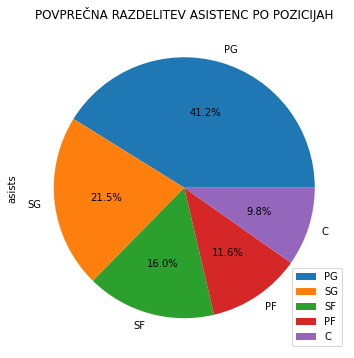

In [218]:
table_position.plot(kind = 'pie', y = 'asists', title = "POVPREČNA RAZDELITEV ASISTENC PO POZICIJAH", figsize = (6,6), autopct='%1.1f%%')
plt.show()

### HIPOTEZA 4
Preveriti želimo ali res igralci pozicije center (C) zabeležijo največ skokov, ter analizirita kako se njihov procent primerja z ostalimi. Hipoteza pravi tudi, da igralci pozicije center (C) skupaj z igralci pozicije PF zabeležijo več kot polovico vseh skokov, zato bo za analizo spet najbolj primeren tortni diagram (spodaj).<br>
Opazimo, da moramo prvi del hipoteze ovršti, saj več skokov zabeležijo igralci pozicije PF (vendar le za 0,2% več). Kljub temu pa lahko potrdimo drugi del hipoteze, saj omenjeni poziciji skupaj zabeležita več kot 50% vseh skokov. Preostali skoki so skoraj enakomerno raporejeni med ostale tri pozicije, nekaj več procentov skokov le še "poberejo" igralci pozicije SF.

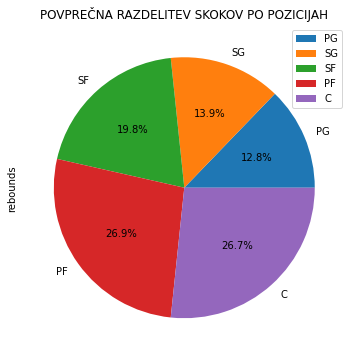

In [219]:
table_position.plot(kind = 'pie', y = 'rebounds', title = "POVPREČNA RAZDELITEV SKOKOV PO POZICIJAH", figsize = (6,6), autopct='%1.1f%%')
plt.show()